### Include

In [1]:
import pandas as pd
import numpy as np 

from copy import copy
from collections import Counter, defaultdict
import ast

import matplotlib.pyplot as plt 
from matplotlib.collections import LineCollection
from matplotlib import cm
from shapely.geometry import Polygon

from scipy.spatial import Delaunay,Voronoi
from scipy.sparse.csgraph import connected_components

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from colormath.color_diff import delta_e_cie2000
from colormath.color_objects import LabColor, sRGBColor
from colormath.color_conversions import convert_color

from igraph import *

from tqdm.notebook import trange, tqdm

import importlib
import TissueGraph as tg

%load_ext line_profiler

### read data

In [2]:
dpath="/home/jperrie/Documents/max_biocart/AllenDendrogramAsTable.csv" 
mpath="/home/jperrie/Documents/max_biocart/HippocampusCellTypeCalls.csv"
meta=pd.read_csv(mpath,index_col=0)
XY = meta[["x_coordinate","y_coordinate"]].values
XY[:,1]=-XY[:,1]

In [3]:
TG = tg.TissueGraph()
TG = TG.BuildSpatialGraph(XY)
TG.Type=cell_label=meta["cell_type_low"]

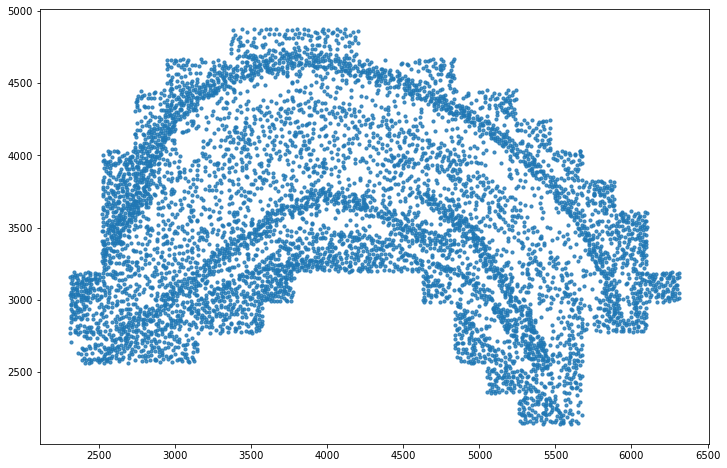

In [4]:
fig,ax=plt.subplots(figsize=(12,8))
plt.scatter(x=TG.X,y=TG.Y,s=10,alpha=0.8)

### Allen dend-cut and find optimal types

In [5]:
dend=pd.read_csv(dpath,index_col=0)
dend=dend.loc[dend["H"]>0]
dend.sort_values(by="H",inplace=True)
dend.set_index(np.arange(len(dend)))
dend["A"]=dend["A"].astype(str)
dend["B"]=dend["B"].astype(str)
dend["C"]=dend["C"].astype(str)

def dend_cut(DendRef,CellTypeVec,Hcut):
    TypeVec=np.asarray(copy(CellTypeVec))
    Nt=sum(DendRef["H"]<=Hcut)
    for i in range(Nt):
        cut = DendRef.iloc[i]
        ix = np.isin(TypeVec,cut[2:4])
        TypeVec[ix]=cut["C"]
    return TypeVec

In [6]:
PossType = dend_cut(dend,TG.Type,0.13)
%lprun -T lprof0 -f TG.ContractGraph TG.ContractGraph(PossType)


*** Profile printout saved to text file 'lprof0'. 


Timer unit: 1e-06 s

Total time: 0.03286 s
File: /home/rwollman/MyProjects/MaximallyInformativeBiocartography/dredFISH/dredFISH/Python/Analysis/Graph/TissueGraph.py
Function: ContractGraph at line 133

Line #      Hits         Time  Per Hit   % Time  Line Contents
   133                                               def ContractGraph(self,TypeVec = None):
   134                                                   """ContractGraph : reduce graph size by merging neighbors of same type. 
   135                                                       Given a vector of types, will contract the graph to merge vertices that are 
   136                                                       both next to each other and of the same type. 
   137                                                   
   138                                                   Input: TypeVec - a vector of Types for each node. 
   139                                                          If TypeVec is not provided will atte

In [ ]:
Hvec=dend["H"].values
Sz = np.empty(len(Hvec))
CondEnt = np.empty(len(Hvec))
AllZones = list()
for i in range(len(Hvec)):
    if i % 25 == 0:
        print(i)
    Sz[i]=len(set(PossType))
    AllZones.append(TG.ContractGraph(PossType))
    CondEnt[i] = AllZones[i].CondEntropy()
print("done")

0
25
50
75
100
125
150
175
200
225
250
275
done


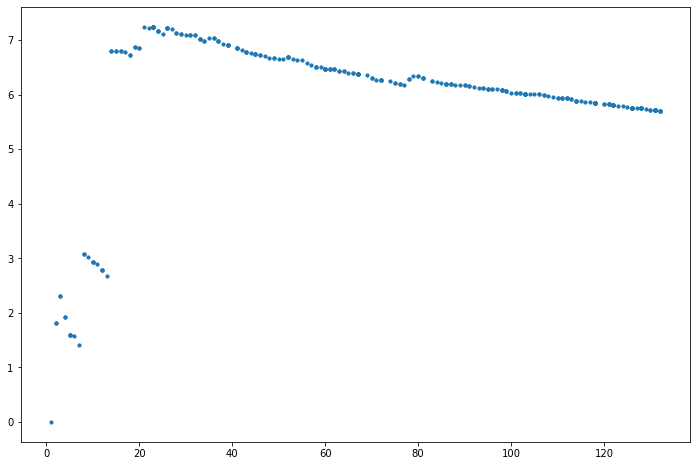

In [14]:
fig,ax=plt.subplots(figsize=(12,8))
plt.scatter(x=Sz,y=CondEnt,s=10)


In [11]:
KL([0.1,0.4,0.5],[0.333,0.333,0.333])

array([-0.12029723,  0.07332882,  0.2032328 ])

In [13]:
TG.G.vs

In [23]:
g = Graph([(0,1), (0,2), (2,3), (3,4), (4,2), (2,5), (5,0), (6,3), (5,6)])
g.vs["age"] = np.asarray([[25,17], 31, 18, 47, 22, 23, 50],dtype=object)

In [24]:
g.vs["age"]

[[25, 17], 31, 18, 47, 22, 23, 50]

In [49]:
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=500, algorithm='auto').fit(TG.XY)

In [50]:
distances, indices = nbrs.kneighbors(TG.XY)

In [51]:
avgdst = np.mean(distances,axis=0)
avgsz = np.arange(nbrs.n_neighbors)    


(500,)
(500,)


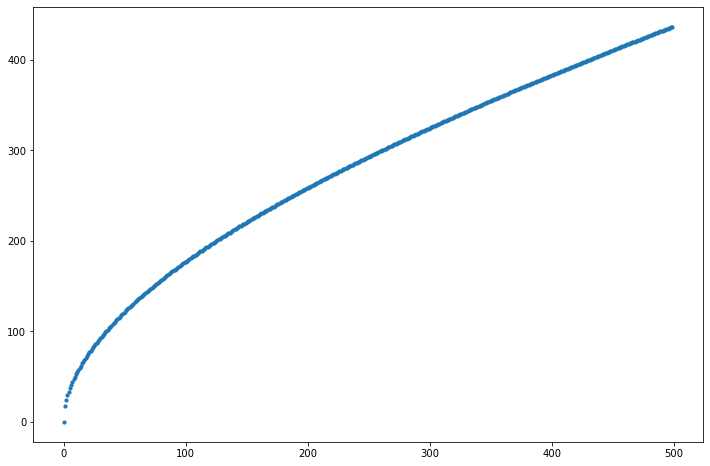

In [52]:
fig,ax=plt.subplots(figsize=(12,8))
plt.scatter(x=avgsz,y=avgdst,s=10)

In [61]:
def funcKL(P,Q): 
    ix = P>0
    return(np.sum(P[ix]*np.log2(P[ix]/Q[ix])))

def funcJSD(P,Q):
    M=0.5*P + 0.5*Q
    return(0.5*funcKL(P,M) + 0.5*funcKL(Q,M))


In [54]:
iter=10
TypeVec = TG.Type
Rnd = np.reshape(np.random.choice(TG.Type, size=iter * nbrs.n_neighbors, replace=True),(iter,nbrs.n_neighbors))
for i in range(nbrs.n_neighbors): 
    unq,cnt = np.unique(Rnd[0,

In [65]:
def table(V,cat):
    unq,freq = np.unique(TG.Type,return_counts = True)
    F = np.zeros(len(cat))
    
    
    
unq,Freq = 
Freq = Freq / sum(Freq)


132

In [ ]:
numpy.apply_along_axis(func1d, axis, arr